# Métodos III - Series de Fourier


## Series de Fourier


Jose A. Hernando

*Departamento de Física de Partículas. Universidade de Santiago de Compostela*

Abril 2019


In [1]:
import time
print(' Last version ', time.asctime() )

 Last version  Tue Apr 30 10:36:49 2019


### Objectivos

Concepto de función par, impar y periódica.

Concepto de base completa de funciones.

Descomposición de una función periódica en series de Fourier.

Relación entre las series de Fourier y las series numéricas.

Mostrar algunos ejemplos sencillos.

In [2]:
# general imports
%matplotlib inline
%reload_ext autoreload
%autoreload 2

# numpy and matplotlib
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
matplotlib.style.use('ggplot')
import graph_utils as gf

figsize = 6, 3.8
cmap    = 'hot'

#### Introducción

Fourier fue un gran matemático Francés de la época Napoleónica que se dio cuenta que una función periódica podía descomponerse en una serie de sumas de senos y cosenos...

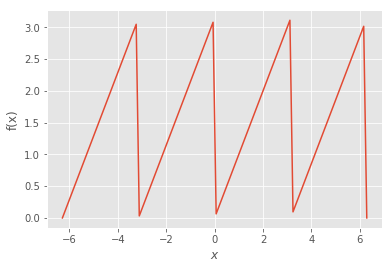

In [3]:
N, T = 2, np.pi
xrange = (-N*T, N*T, 100)
fx = lambda x: np.mod(x, T)
gf.fun1d(fx, xrange);

### Series de Fourier

#### Funciones pares, impares y periódicas.

Decimos que una función $f(x)$ es **periódica** con periodo $T$ si: $f(x + T) = f(x)$.

Por ejemplo, $f(x) = sin(x)$ es una función periódica de periodo $T = 2\pi$, $\sin(2\pi + x) = \sin(x)$


Una función es par si $f(- x) = f(x)$ e impar si $f(-x) = - f(x)$

Por ejemplo, $f(x) = \cos(n x)$ es par, y $f(x) = \sin(x)$ es impar.

*Ejercicio:* Verifica que dado $n$ natural, $n>0$, $\cos (n x)$ es par y $\sin(nx)$ impar, y ambos son periódicas con periodo $2 \pi$

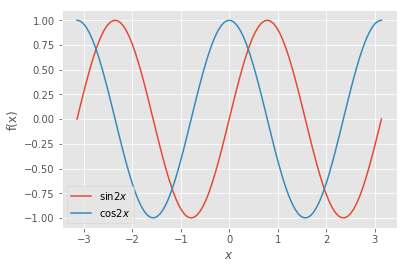

In [4]:
n, m, N = 2, 2, 1
xrange = (-N*np.pi, N*np.pi, 100)
sx = lambda x : np.sin(n*x)
cx = lambda x : np.cos(m*x)
gf.fun1d(sx, xrange, label ='$\sin '+str(n)+'x$')
gf.fun1d(cx, xrange, newfig = False, label = '$\cos '+str(m)+'x$');

*Teorema*: Sea $f(x)$ una función par y $g(x), \, h(x)$ impar, cumplen:

1) $g(0) = 0$

2) $\int_{-a}^{a} f(x) \, \mathrm{d}x = 2 \int_0^a f(x) \, \mathrm{d}x$

3) $\int_{-a}^a g(x) = 0$

4) $f(x) \, g(x)$ es impar

5) $g(x) \, h(x)$ es par

También se cumple:
    
1) $\int_{-\pi}^{\pi} g(x) \, \cos(nx) \, \mathrm{d}x = 0$, 

2) $\int_{\pi}^{\pi} f(x) \, \sin(nx) \, \mathrm{d}x = 0$,

para $n=1, 2, \dots \in \mathcal{N}$


*Ejercicio*: Toda función $f(x)$ se puede expresar como la suma de una función par y otra impar.

Definimos:
$$
h(x) = \frac{1}{2}(f(x)  + f(-x)), \; g(x) = \frac{1}{2}(f(x) - f(-x))
$$

donde $h(x)$ es par, $g(x)$ es impar y $f(x) = h(x) + g(x)$

*Ejemplo:* Convertir $f(x) = 0$ si $x \le 0$ y 1 si $x \gt 0$ en una suma de función par e impar.

#### Funciones ortogonales

Las siguiente funciones, $\sin(nx), \, \cos(mx)$ con $n, m = 1, 2, \dots \in \mathcal{N}$ son "ortogonales".

*Teorema:* Se cumple:

1) $\int_{-\pi}^{\pi} \sin(nx) \cos (mx) \mathrm{d}x = 0$

2) $\int_{-\pi}^{\pi} \cos(nx) \cos (mx) \mathrm{d}x = \pi \delta_{nm}$

3) $\int_{-\pi}^{\pi} \sin(nx) \sin (mx) \mathrm{d}x = \pi \delta_{nm}$

donde: 

$ \delta_{nm} = 1$ si $n = m$ y 0 si $n \ne m$

*Ejercicio*: Comprueba que las funciones, $\sin n x, \, \cos m x $, con $n, m = 1, 2, \dots \in \mathcal{N}$ son ortogonales en $[-\pi, \pi]$
 

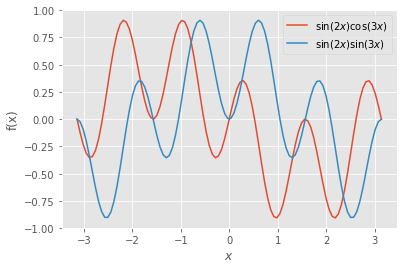

In [5]:
n, m, N = 2, 3, 1
xrange = (-N*np.pi, N*np.pi, 100)
scx = lambda x : np.sin(n*x) * np.cos(m*x)
ssx = lambda x : np.sin(n*x) * np.sin(m*x)
ccx = lambda x : np.cos(n*x) * np.cos(m*x)
gf.fun1d(scx, xrange, label = '$\sin('+str(n)+'x) \cos('+str(m)+'x)$')
gf.fun1d(ssx, xrange, newfig = False, label = '$\sin('+str(n)+'x) \sin('+str(m)+'x)$');
#gf.fun1d(ccx, xrange, newfig = False, label = '$\cos('+str(n)+'x) \cos('+str(m)+'x)$');

La integral
$$
\int_{-\pi}^{\pi} \sin n x \cos mx \, \mathrm{d}x = 0
$$
es nula por ser el integrando una  función impar.

La integral
$$
\int_{-\pi}^{\pi} \sin nx \sin mx \, \mathrm{d}x 
= \int_{-\pi}^{\pi} \frac{1}{2} \left( \cos (n -m) x - \cos (n+m) x \right) \mathrm{d}x
$$
$$
= \frac{1}{2}\left( \frac{1}{n-m} \sin (n-m)x - \frac{1}{n+m} \sin(n+m) x\right) \Big|_{-\pi}^{\pi}
$$

que vale 0 si $ n \ne m$ y para $n=m$
$$
\frac{1}{2}\left( x - \frac{1}{2 n} \sin 2n x \right) \Big|_{-\pi}^{\pi} = \pi
$$


y finalmente, la integral
$$
\int_{-\pi}^{\pi} \cos nx \cos mx \, \mathrm{d}x 
= \int_{-\pi}^{\pi} \frac{1}{2} \left( \cos (n -m) x + \cos (n+m) x \right) \mathrm{d}x
$$
$$
= \frac{1}{2}\left( \frac{1}{n-m} \sin (n-m)x + \frac{1}{n+m} \sin(n+m) x\right) \Big|_{-\pi}^{\pi}
$$

que vale 0 si $ n \ne m$ y para $n=m$
$$
\frac{1}{2}\left( x + \frac{1}{2 n} \sin 2n x \right) \Big|_{\pi}^{\pi} = \pi
$$

Diremos que dos **funciones son ortogonales**, $f(x), \, g(x)$, en un intervalo $[a, b]$ si:

$$
\int_a^b f(x) \, g(x) \, \mathrm{d}x = 0
$$

y ortonormales si su norma es unidad, siendo su **norma**:

$$
\int_a^b f^2(x) \, \mathrm{d}x = \int_a^b g^2(x) \, \mathrm{d}x = 1
$$

Decimos que un conjunto numerable $\{\Psi_n(x)\}$ con $n \in \mathcal{N}$ es completo en un intervalo $[a, b]$, si son funciones ortonormales que permiten que "toda" función $f(x)$ pueda expresarse como:

$$
f(x) = \sum_n a_n \, \Psi_n(x)
$$

donde $a_n$ son los coeficientes:

$$
a_n = \int_a^b f(x) \, \Psi_n(x) \mathrm{d}x
$$

esto es, podemos dar una función como una serie de funciones.

#### Series de Fourier

El siguiente conjunto de funciones definidas es completo en $[-\pi, \pi]$:

$$
\frac{1}{\sqrt{2\pi}}, \frac{1}{\sqrt{\pi}} \sin nx, \frac{1}{\sqrt{\pi}} \cos nx
$$

con $n=1, 2, \dots \in \mathrm{N}$

Toda función periódica continua, acotada, $f(x)$, con periodo $T= 2 \pi$ puede darse como una serie de Fourier:
    
$$
f(x) = \frac{a_0}{2} + \sum_{n=1} a_n \cos nx  + \sum_{n=1} b_n \sin nx
$$

donde:

$$
a_0 = \frac{1}{\pi} \int_{-\pi}^{\pi} f(x) \, \mathrm{d}x
$$

$$
a_n = \frac{1}{\pi} \int_{-\pi}^{\pi} f(x) \, \cos nx \, \mathrm{d}x
$$

$$
b_n = \frac{1}{\pi} \int_{-\pi}^{\pi} f(x) \, \sin nx \, \mathrm{d}x
$$

*Cuestión*: Si $f(x)$ es continua con periodo $2\pi$ y par, ¿tendra coeficientes $b_n$? ¿Y si es impar tendrá $a_n$?

*Ejemplo*: Obtener la serie de Fourier de la función $f(x) = x$ si $x \ge 0$ y $f(x) = - x$ si $x \le 0$.

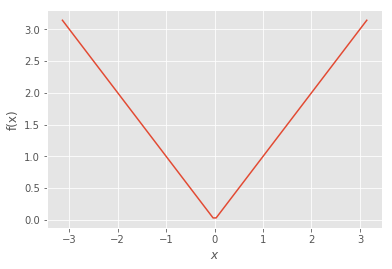

In [6]:
xrange = (-np.pi, np.pi, 100)
def fx(x):
    sign = x/abs(x)
    return sign*x
gf.fun1d(fx, xrange);

Es una función par, por lo tanto $b_n = 0$.

$$
a_0 = \frac{2}{\pi} \int_0^\pi x \, \mathrm{d}x = \frac{x^2}{\pi} \Big|_0^\pi = \pi
$$

$$
a_n = \frac{2}{\pi} \int_0^\pi x \, \cos n x \, \mathrm{d}x 
= \frac{2}{\pi} \left( \frac{x}{n} \sin n x + \frac{1}{n^2} \cos n x\right) \Big|_0^\pi = 2 \frac{ ((-1)^n -1)}{\pi n^2}
$$

Si $n$ es par, $a_n = 0$. Podemos dar

$$
a_k = \frac{-4}{\pi (2k+1)^2}, \; k = 0, 1, 2 \in \mathcal{N}
$$

Asi:
$$
S(x) = \frac{\pi}{2} - \frac{4}{\pi} \sum_k \frac{1}{(2k+1)^2} \cos (2k+1) x
$$

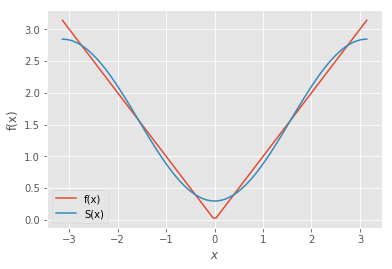

In [7]:
N = 1
def sx(x):
    ss = np.pi/2
    for k in range(0, N):
        ss = ss + -4*np.cos((2*k+1)*x)/(np.pi*(2*k+1)*(2*k+1))
    return  ss
gf.fun1d(fx, xrange, label = 'f(x)');
gf.fun1d(sx, xrange, newfig = False, label = 'S(x)');

A veces las series de Fourier pueden ayudarnos a calcular series numéricas

*Ejercicio*: Calcula, usando el desarrollo de Fourier anterior, el valor de:
        
$$
\sum_{k=0}^\infty \frac{1}{(2 k + 1)^2}
$$

*Solución*: Si valoramos la serie en $x=0$ obtenemos:
       
$$
S(0) = \frac{\pi}{2} - \sum_{k=0}^\infty \frac{4}{(2 k +1)^2 \pi} = 0
$$

Esto es:

$$
\sum_{k=0}^\infty \frac{1}{(2k+1)^2} = \frac{\pi^2}{8}
$$

**Teorema de Dirichlet** Toda función periódica en $[-\pi, \pi]$ (continua en un número finito de trozos y con un número finito de máximos y mínimos) admite desarrollo en serie de Fourier.

*Solo* que la función puede ser discontinua en un número finito de puntos mientras que la serie de Fourier *siempre* en continua. En los puntos de discontinuidad la serie nos da el valor medio entre su valor a la izquierda y la derecha de la función en ese punto.

*Ejemplo:* Sea la función definida en $[-\pi, \pi]$
$$
f(x) = 0 \; \mathrm{si} \, x \lt 0, 1 \; \mathrm{si} \, x \ge 0
$$

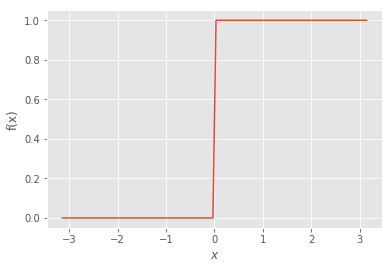

In [8]:
xrange = (-np.pi, np.pi, 100)
def fx(x):
    sig = x/abs(x)
    return  1/2 + sig/2.
gf.fun1d(fx, xrange);

$$
a_0 = \frac{1}{\pi} \int_{-\pi}^{\pi} f(x) \, \mathrm{d}x = \frac{1}{\pi} \int_0^{\pi} \mathrm{d}x = 1
$$

$$
a_n = \frac{1}{\pi} \int_{-\pi}^{\pi} f(x) \, \cos nx \, \mathrm{d}x = \frac{1}{\pi} \int_0^{\pi} \cos nx \, \mathrm{d}x =  \frac{1}{n \pi} \sin n\pi \Big|_0^\pi = 0
$$

$$
b_n = \frac{1}{\pi} \int_{-\pi}^{\pi} f(x) \, \sin nx \, \mathrm{d}x = \frac{1}{\pi} \int_0^{\pi} \sin nx \, \mathrm{d}x = -\frac{1}{n \pi} \cos n\pi \Big|_0^{\pi} = -  \frac{(-1)^n -1}{n \pi} =  \frac{1-(-1)^n}{n \pi}
$$

los términos $b_n$ para $n$ par se anulan, así podemos dar:
$$
b_k = \frac{1}{(2k+1) \pi}
$$
con $k=0, 1, 2 \dots \in \mathcal{N}$

Por lo tanto la función se expresa con la siguiente serie de Fourier:
    
$$
S(x) = \frac{1}{2} + \sum_{k=0} \frac{2}{(2k+1) \pi} \sin (2k+1)x 
$$
    

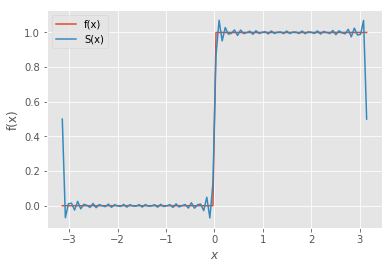

In [9]:
N = 20
def sx(x):
    ss = 1./2.
    for k in range(0, N):
        ss = ss + 2*np.sin((2*k+1)*x)/(np.pi*(2*k+1))
    return  ss
gf.fun1d(fx, xrange, label = 'f(x)');
gf.fun1d(sx, xrange, newfig = False, label = 'S(x)');

*Cuestión:* ¿Cuánto vale la serie de Fourier en $x=0$? ¿Y la función?

#### Series periódicas con periodo $2L$

Sea ahora una función periódica con periodo $[-L, L]$, la podemos dar como una serie de Fourier a partir del siguiente conjunto de funcioner ortonormales.

$$
\frac{1}{\sqrt{2L}}, \, \frac{1}{\sqrt{L}} \sin  \frac{n\pi x}{L}, \, \frac{1}{\sqrt{L}} \cos \frac{n \pi x}{L}
$$


con:

$$
a_0 = \frac{1}{L} \int_{-L}^{L} f(x) \, \mathrm{d}x
$$

$$
a_n = \frac{1}{L} \int_{-L}^{L} f(x) \, \cos \frac{n \pi x}{L} \, \mathrm{d}x
$$

$$
b_n = \frac{1}{L} \int_{-L}^{L} f(x) \, \sin \frac{n \pi x}{L} \, \mathrm{d}x
$$

Así:
$$
S(x) = \frac{a_0}{L} + \sum_{n} a_n \cos \frac{n \pi x}{L} + b_n \sin \frac{n \pi x}{L}
$$

*Cuestión*: ¿Qué funciones y desarrollo obtienes con $L=\pi$?

#### Desarrollo de Fourier para una función no periódica definida en un intervalo [0, L]

¿Y si la función está definida solo en una región $[0, L]$? Podemos extender la función a $[-L, L]$ por ejemplo $f(-x) = f(x)$ haciéndola par, y calculado su serie de Fourier, y declarándola válida solo en el intervalo $[0, L]$

*Ejercicio:* Sea $f(x) = x^2$ definida en $[0, 2]$ dar su desarrollo en serie de Fourier.

definimos $g(x) = x^2$ en $[-2, 2]$

$$
a_0 = \frac{1}{2} \int_{-2}^{2} x^2 \mathrm{d}x = \int_0^2 x^2 \mathrm{d}x = \frac{x^3}{3} \Big|_0^2 = \frac{8}{3}
$$

$$
a_n = \frac{1}{2} \int_{-2}^2 x^2 \cos \frac{n \pi x}{2} \, \mathrm{d}x
= \int_{0}^2 x^2 \cos \frac{n \pi x}{2} \, \mathrm{d}x
$$

integrando por partes:

$$
= \frac{2x^2}{n \pi} \sin \frac{n\pi x}{2}  - \int_0^2 \frac{4x}{n\pi} \sin \frac{n\pi x}{2} \mathrm{d}x
$$
$$
= \left[\frac{2x^2}{n \pi} \sin \frac{n\pi x}{2}  + \frac{8x}{(n \pi)^2} \cos \frac{n\pi x}{2} - \frac{16}{(n\pi)^3} \sin \frac{n \pi x}{2} \right] \Big|_0^2
= \frac{16}{(n \pi)^2} (-1)^n
$$

Luego:
$$
S(x) = \frac{4}{3} + 16 \sum_n \frac{(-1)^n}{(n \pi)^2} \cos \frac{n \pi x}{2}
$$

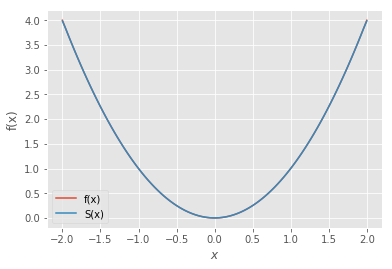

In [10]:
N = 100
xrange = (-2., 2., 100)
fx = lambda x: x*x
def sx(x):
    ss = 4./3.
    for n in range(1, N):
        ss = ss + 16 * (-1)**n * np.cos( n*np.pi*x/2) / (n*n*np.pi*np.pi)
    return ss
gf.fun1d(fx, xrange, label ='f(x)');
gf.fun1d(sx, xrange, newfig = False, label = 'S(x)');

**La belleza de los números complejos**

nos permite reescribir de forma compacta y elegante los desarrollos de Fourier, date cuenta:
    
$$
\cos n x = \frac{1}{2} \left( e^{inx} + e^{-inx} \right), \; \sin n x = -\frac{i}{2} \left( e^{inx} - e^{-inx} \right),  
$$

Así:
$$
S(x) = \frac{a_0}{2} + \frac{1}{2} \sum_{n=1} (a_n - i b_n) \, e^{inx} + \frac{1}{2} \sum_{n=1} (a_n + i b_n) \, e^{-inx}
$$

Si definimos:
$$
c_0 = a_0/2, \; c_n = a_n - i b_n, \; c_{-n} = c^*_n = a_n + i b_n
$$

tenemos:

$$
S(x) = \sum_{n = -\infty}^{\infty} c_n \, e^{inx}
$$

*Pero ésta es otra historia y será contanda en otro lugar.*

#### ¡Aún hay más!

Joseph Fourier fue un gran físico y matemático Francés que se dio cuenta que una función periódica podía descomponerse en una serie de sumas de senos y cosenos. Fourier participó en la famosa expedición "científica" de Napoleón a Egipto.

<img src="imgs/Fourier.jpg" width="200"/>

Aquí tienes su entrada en la Wikipedia: https://es.wikipedia.org/wiki/Joseph_Fourier

Por cierto, Dirichlet fue alumno suyo.

En análisis en transformadas de Fourier es fundamental en Física cuántica, en Optica, y tiene aplicaciones fundamentales en propagación de señales y tratamiento de imágenes.

¡Algunos de tus filtros de instagram son algoritmos que modifican las transformadas de Fourier de las imágenes!

